In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import PIL
from PIL import Image
from scipy import ndimage



In [2]:
def load_dataset():
  train_dataset=h5py.File('train_catvnoncat.h5',"r")
  #print(list(train_dataset))

  train_set_x_orig=np.array(train_dataset["train_set_x"][:])
  train_set_y_orig=np.array(train_dataset["train_set_y"][:])
  #print(train_set_y_orig)

  test_dataset=h5py.File('test_catvnoncat.h5',"r")
  test_set_x_orig=np.array(test_dataset["test_set_x"][:])
  test_set_y_orig=np.array(test_dataset["test_set_y"][:])

  classes=np.array(test_dataset["list_classes"][:])

  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [4]:
print(train_set_x_orig.shape)


(209, 64, 64, 3)


it's a 'cat' picture.


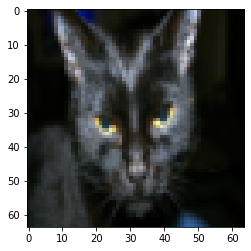

In [5]:
index=25
plt.imshow(train_set_x_orig[index])
print ( "it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [28]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=test_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [7]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))


train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [8]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255


In [9]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s
  

In [10]:
def initialize_with_zeros(dim):
  w=np.zeros((dim,1))
  b=0
  return w,b


In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))


w = [[0.]
 [0.]]
b = 0


In [12]:
def propagate(w,b,X,Y):
  # w=weights thetas
  # b=bias
  #X=training data 
  #Y= label
  m=X.shape[1]#209
  #Forward propagation
  A=sigmoid(np.dot(w.T,X)+b)
  cost = -1./m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
  #
  #Backward propagation i.e gradient
  dw=1./m*np.dot(X,(A-Y).T)
  db=1./m*np.sum((A-Y))


  grads={"dw": dw,"db":db}
  return grads ,cost

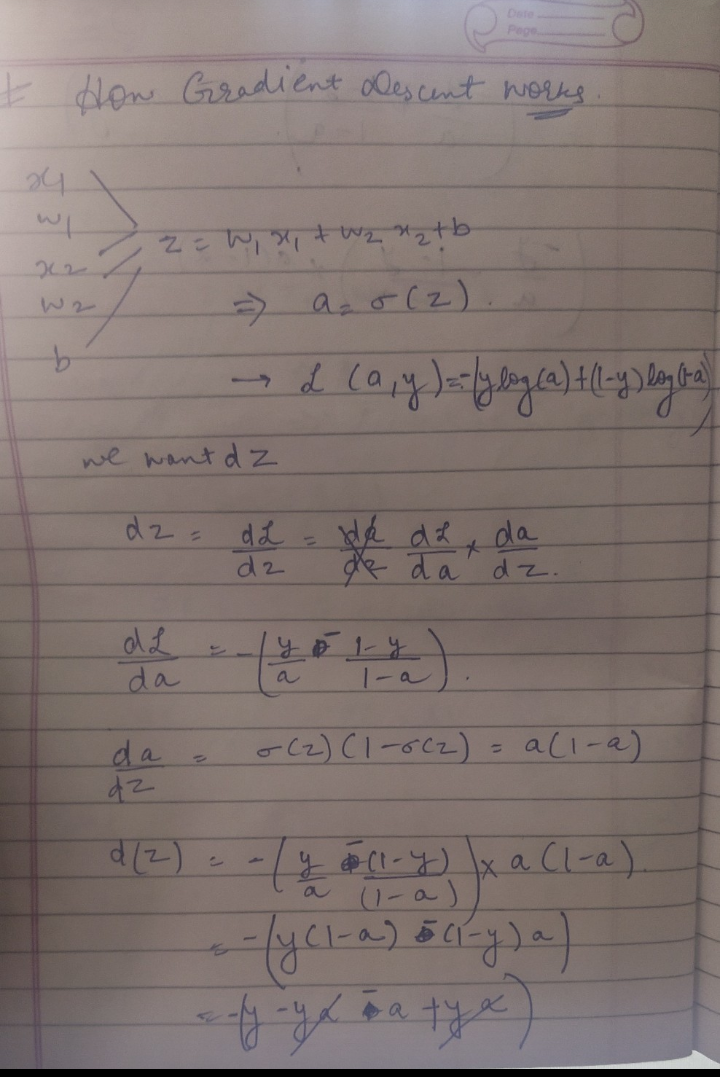

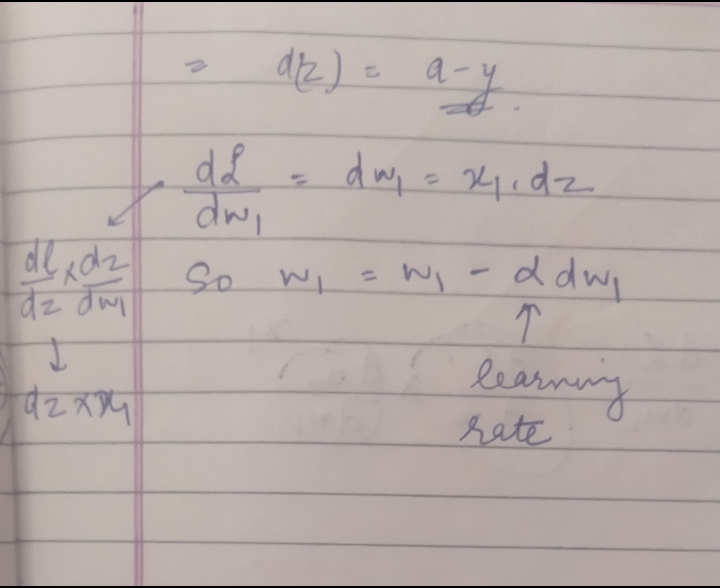

In [23]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
  costs=[]
  for i in range (num_iterations):
    grads,cost=propagate(w,b,X,Y)
    dw=grads["dw"]
    db=grads["db"]
    w=w-learning_rate*dw
    b=b-learning_rate*db
    if i%100 ==0:
      costs.append(cost)
    if print_cost and i%100 ==0:
      print("Cost after iteration %i : %f"%(i,cost))
  print(w.shape)
  params={"w":w,"b":b}
  grads={"dw":dw,"db":db}
  return params,grads,costs




In [24]:
def predict(w,b,X):
  m=X.shape[1]
  Y_prediction=np.zeros((1,m))
  w=w.reshape(X.shape[0],1)
  A=sigmoid(np.dot(w.T,X)+b)
  for i in range (A.shape[1]):
    if A[0,i]>0.5:
      Y_prediction[0,i]=1
    else:
      Y_prediction[0,i]=0
  return Y_prediction
  


In [25]:
def model(X_train,Y_train,X_test,Y_test,num_iterations,learning_rate,print_cost):
  w,b=initialize_with_zeros(X_train.shape[0])
  parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost=print_cost)
  w=parameters["w"]
  b=parameters["b"]

  Y_prediction_test=predict(w,b,X_test)
  Y_prediction_train=predict(w,b,X_train)
  print(Y_prediction_train)
  print(Y_train)

  print("train accuracy:"+str((100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))+"%")
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
  d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}
  
  return d


In [37]:
d = model(train_set_x, train_set_y ,test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0 : 0.693147
Cost after iteration 100 : 0.823921
Cost after iteration 200 : 0.418944
Cost after iteration 300 : 0.617350
Cost after iteration 400 : 0.522116
Cost after iteration 500 : 0.387709
Cost after iteration 600 : 0.236254
Cost after iteration 700 : 0.154222
Cost after iteration 800 : 0.135328
Cost after iteration 900 : 0.124971
Cost after iteration 1000 : 0.116478
Cost after iteration 1100 : 0.109193
Cost after iteration 1200 : 0.102804
Cost after iteration 1300 : 0.097130
Cost after iteration 1400 : 0.092043
Cost after iteration 1500 : 0.087453
Cost after iteration 1600 : 0.083286
Cost after iteration 1700 : 0.079487
Cost after iteration 1800 : 0.076007
Cost after iteration 1900 : 0.072809
(12288, 1)
[[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1

[0.6931471805599453, 0.5845083636993086, 0.46694904094655476, 0.37600686694802077, 0.3314632893282512, 0.30327306747438293, 0.27987958658260487, 0.26004213692587574, 0.2429406846779662, 0.22800422256726063, 0.21481951378449635, 0.20307819060644985, 0.19254427716706862, 0.18303333796883503, 0.17439859438448874, 0.16652139705400335, 0.15930451829756614, 0.15266732471296504, 0.1465422350398234, 0.1408720757031016]


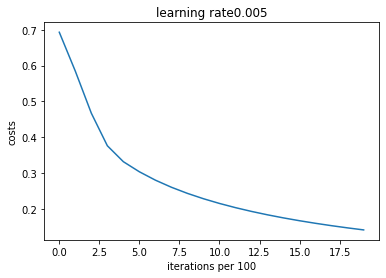

In [17]:
print(d["costs"])
plt.plot(d["costs"])
plt.ylabel("costs")
plt.xlabel("iterations per 100")
plt.title("learning rate" +str(d["learning_rate"]))
plt.show()


learning rate is: 0.01
[[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 

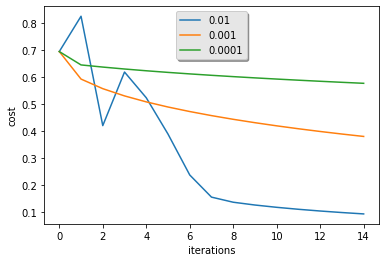

In [18]:
# trying different learning rate
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
for i in learning_rates:
  plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


y = 1.0, your algorithm predicts a "cat" picture.


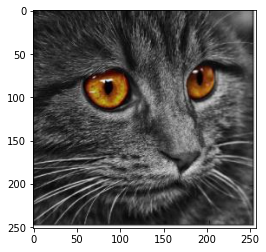

In [41]:
my_image = "cat.jpg"   


image = np.array(ndimage.imread(my_image, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")